In [1]:
import polars as pl
import seaborn as sns

from rna_model import load_training_dataset

In [2]:
lf = load_training_dataset()

In [3]:
sequence_lf = lf.group_by("sequence", maintain_order=True).count()
sequence_df = sequence_lf.collect(streaming=True)

In [4]:
sequence_df.height

806573

In [5]:
sequence_df.head(10)

sequence,count
str,u32
"""GGGAACGACUCGAG…",2
"""GGGAACGACUCGAG…",2
"""GGGAACGACUCGAG…",2
"""GGGAACGACUCGAG…",2
"""GGGAACGACUCGAG…",2
"""GGGAACGACUCGAG…",2
"""GGGAACGACUCGAG…",2
"""GGGAACGACUCGAG…",2
"""GGGAACGACUCGAG…",2


In [6]:
sequence_df.select(pl.max("count"))

count
u32
10


In [7]:
sequence_df.select(pl.min("count"))

count
u32
2


In [8]:
del sequence_lf
del sequence_df

In [9]:
df = lf.filter(pl.int_range(0, pl.count()).over("sequence") < 2).collect(streaming=True) 

In [10]:
df.head()

sequence,experiment_type,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,reactivity_0010,reactivity_0011,reactivity_0012,reactivity_0013,reactivity_0014,reactivity_0015,reactivity_0016,reactivity_0017,reactivity_0018,reactivity_0019,reactivity_0020,reactivity_0021,reactivity_0022,reactivity_0023,reactivity_0024,reactivity_0025,reactivity_0026,reactivity_0027,reactivity_0028,reactivity_0029,reactivity_0030,reactivity_0031,reactivity_0032,reactivity_0033,reactivity_0034,reactivity_0035,…,reactivity_0199,reactivity_0200,reactivity_0201,reactivity_0202,reactivity_0203,reactivity_0204,reactivity_0205,reactivity_0206,reactivity_error_0178,reactivity_error_0179,reactivity_error_0180,reactivity_error_0181,reactivity_error_0182,reactivity_error_0183,reactivity_error_0184,reactivity_error_0185,reactivity_error_0186,reactivity_error_0187,reactivity_error_0188,reactivity_error_0189,reactivity_error_0190,reactivity_error_0191,reactivity_error_0192,reactivity_error_0193,reactivity_error_0194,reactivity_error_0195,reactivity_error_0196,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""GGGAACGACUCGAG…","""2A3_MaP""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.039,0.455,-0.207,-0.098,0.524,-0.039,-0.138,0.0,0.088,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""GGGAACGACUCGAG…","""2A3_MaP""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.036,0.683,0.189,-0.005,-0.039,-0.017,0.027,-0.007,0.148,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""GGGAACGACUCGAG…","""2A3_MaP""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.039,0.354,-0.573,-0.061,-0.094,0.016,-0.013,0.05,-0.043,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""GGGAACGACUCGAG…","""2A3_MaP""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156,0.435,0.138,0.16,0.194,-0.002,-0.01,0.0,0.043,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""GGGAACGACUCGAG…","""2A3_MaP""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.086,1.018,0.354,0.577,0.237,0.097,-0.017,0.063,0.183,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


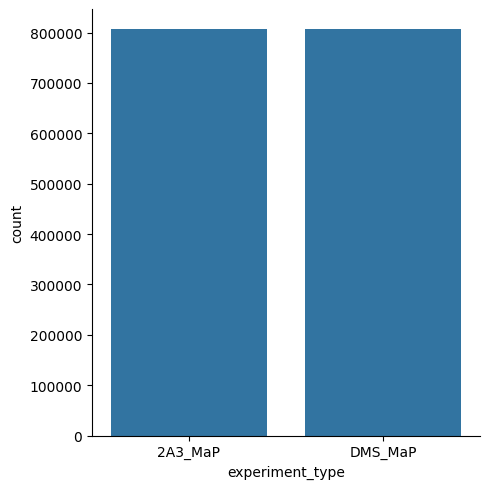

In [11]:
experiments_df = df.select(pl.col('experiment_type'))
sns.catplot(data=experiments_df,x="experiment_type", kind="count")
del experiments_df

In [12]:
df.height

1613146

In [13]:
sequence_lf = df.lazy().group_by("sequence", maintain_order=True).count()
del df
sequence_df = sequence_lf.collect(streaming=True)

In [14]:
sequence_df.select(pl.max("count"))

count
u32
2


In [15]:
sequence_df.select(pl.min("count"))

count
u32
2


In [16]:
del sequence_lf
del sequence_df